In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('movies_credits_transform2.csv', sep = ',')

C:\Users\Rossella\AppData\Local\Temp\ipykernel_27768\2456251221.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_credits_transform2.csv', sep = ',')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45379 non-null  float64
 1   id                 45379 non-null  object 
 2   original_language  45368 non-null  object 
 3   overview           44438 non-null  object 
 4   popularity         45377 non-null  object 
 5   release_date       45379 non-null  object 
 6   revenue            45379 non-null  float64
 7   runtime            45130 non-null  float64
 8   status             45296 non-null  object 
 9   tagline            20398 non-null  object 
 10  title              45376 non-null  object 
 11  vote_average       45376 non-null  float64
 12  vote_count         45376 non-null  float64
 13  franquicia_name    4488 non-null   object 
 14  generos_name       42995 non-null  object 
 15  productoras_name   33580 non-null  object 
 16  countries_name     391

In [15]:
# Eliminar la columna "Unnamed: 0" por posición , ya que de otra manera no me era posible
df = df.drop(df.columns[20], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45379 non-null  float64
 1   id                 45379 non-null  object 
 2   original_language  45368 non-null  object 
 3   overview           44438 non-null  object 
 4   popularity         45377 non-null  object 
 5   release_date       45379 non-null  object 
 6   revenue            45379 non-null  float64
 7   runtime            45130 non-null  float64
 8   status             45296 non-null  object 
 9   tagline            20398 non-null  object 
 10  title              45376 non-null  object 
 11  vote_average       45376 non-null  float64
 12  vote_count         45376 non-null  float64
 13  franquicia_name    4488 non-null   object 
 14  generos_name       42995 non-null  object 
 15  productoras_name   33580 non-null  object 
 16  countries_name     391

In [11]:
# Eliminaré algunas columnas que no necesitaré para el estudio estadistico.

df.describe()

,budget,revenue,runtime,vote_average,vote_count,release_year,return,Unnamed: 0,id.1
count,4.537900e+04,4.537900e+04,45130.000000,45376.000000,45376.000000,45379.000000,45379.0,45476.000000,45476.000000
mean,4.233791e+06,1.122936e+07,94.181675,5.624070,110.096439,1991.879746,inf,22737.500000,108345.997537
std,1.744113e+07,6.438789e+07,38.341059,1.915423,491.742894,24.055222,NaN,13127.934758,112443.796536
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0,0.000000,2.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0,11368.750000,26443.250000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0,22737.500000,60002.500000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0,34106.250000,157302.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf,45475.000000,469172.000000


In [12]:
# Outliers en las variables numéricas

cols_num = ['budget','popularity','revenue','runtime','vote_average', 'vote_count','return']

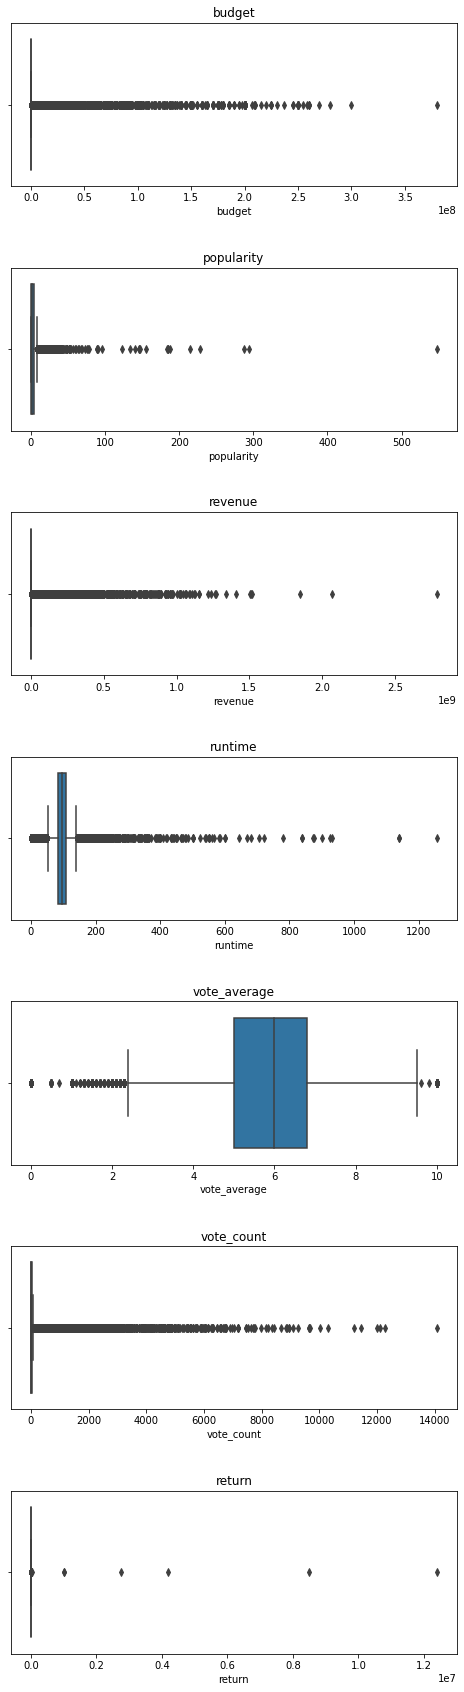

In [21]:
fig, ax = plt.subplots(nrows = 7, ncols = 1 , figsize = (8,30))
fig.subplots_adjust(hspace = 0.5)
for i, col in enumerate(cols_num):
     df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir la columna a tipo numérico
     sns.boxplot(x = col, data = df, ax = ax[i])
     ax[i].set_title(col)

# Obtenemos valores fuera del rango, pero que en el caso del budget puede perfectamente haber películas que hayan superado el presupuesto esperado
# En el caso de popuaridad tampoco es medibel ya que muchas películas pueden superar las expectativa,lo mismo sucede con las ganancias, vote_average
#(que los votos muchas veces las personas no son sinceras y puede haber resultados que no son los esperados)y vote_count"

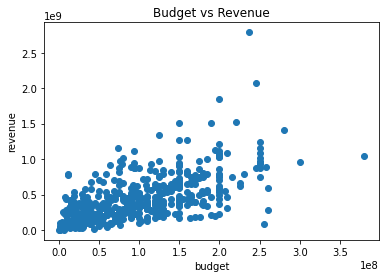

In [13]:
import matplotlib.pyplot as plt

# Realizo un diagrama de dispersión teniendo en cuenta el número de votos (que fue el que tuvimos en cuenta cuando hicimos la función def 
# voto_titulo).Vemos que hay unos outliers, pero debemos considerar que altos presupuestos muchas veces no va de la mano con las ganancias. 
fig = plt.figure()
ax = plt.axes()

budget =df[df.vote_count.values>= 2000]['budget']
revenue = df[df.vote_count.values>= 2000]['revenue']
ax.scatter(budget, revenue)
ax.set(xlabel='budget', ylabel='revenue', title='Budget vs Revenue')
plt.show()

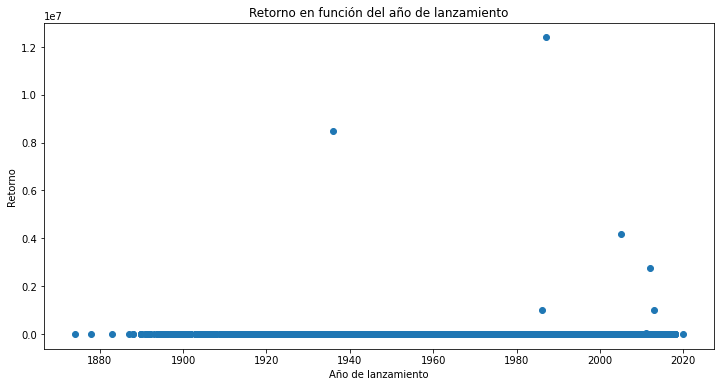

In [16]:
# Graficamos  el retorno en función del año de lanzamiento
plt.figure(figsize=(12, 6))
plt.scatter(df['release_year'], df['return'])
plt.xlabel('Año de lanzamiento')
plt.ylabel('Retorno')
plt.title('Retorno en función del año de lanzamiento')
plt.show()

# Apreciamos que no tenemos muchs datos en algunos años, tal vez no se tenína tantos datos, pero llama un poco la atención el valor en el año 1940
# el cual parece un valor aislado, aunque también debemos saber, si paso algo especial ese año.

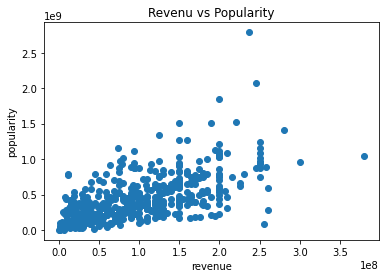

In [17]:
# Graficamos el retorno según la popularidad
fig = plt.figure()
ax = plt.axes()

revenue = df[df.vote_count.values>= 2000]['revenue']
popularity =df[df.vote_count.values>= 2000]['popularity']

ax.scatter(budget, revenue)
ax.set(xlabel='revenue', ylabel='popularity', title='Revenu vs Popularity')
plt.show()

# vemos la variabilidad que hay en este mercado, ya que muchas veces hau muy buenas ganancias , siendo no tan popular, por el contrario hay
# películas muy polulares con pocas ganancias. Todo eseto va a depender de otras variables como el presupuesto por ejemplo. 

In [18]:
# Matiz de correlación, teniendo en cuenta algunas variables
#  Seleccionp las columnas relevantes
variables = df[['budget', 'popularity','revenue', 'vote_average', 'vote_count','return']]

# Calcular la matriz de correlación\n",
correlation_matrix = variables.corr()
print(correlation_matrix)
   

                budget   revenue  vote_average  vote_count    return
budget        1.000000  0.768667      0.073165    0.676611 -0.002240
revenue       0.768667  1.000000      0.083799    0.812010  0.000796
vote_average  0.073165  0.083799      1.000000    0.123600  0.005747
vote_count    0.676611  0.812010      0.123600    1.000000  0.003597
return       -0.002240  0.000796      0.005747    0.003597  1.000000


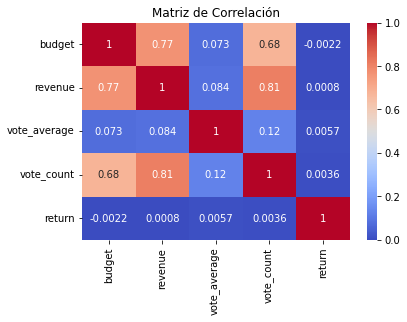

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()